<a href="https://colab.research.google.com/github/MadeaRiggs/image-classification-with-deep-learning/blob/main/simplilearn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#loading the CIFAR10 dataset
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
#2D array
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

When you DON'T want to change the first dimension that represents images i.e (50000, 1) you don't want to change the '50000', put '-1'

We need to flatten the 2nd dimension '1' so that '[6]' is NOT an array but an element

In [ ]:
#reshaping and flattening
y_train= y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
classes[9]

'truck'

In [ ]:
#view a sample of image
def plot_sample(X, y, index):
  plt.figure(figsize= (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

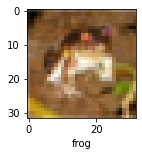

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
#normalize images by dividing them into their pixel values
X_train= X_train / 255
X_test= X_test / 255

`categorical_cross_entropy` is used when 'y' is on hot encoded vector while `sparse_categorical_cross_entropy` is used when 'y' is directly a value e.g 7

In [ ]:
#creating ANN model
ann= models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(
    optimizer= 'SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 6ms/step - loss: 1.8148 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6251 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5414 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4822 - accuracy: 0.4761
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4338 - accuracy: 0.4963


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4489 - accuracy: 0.4855


[1.4488883018493652, 0.4855000078678131]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1000
           1       0.48      0.77      0.59      1000
           2       0.39      0.26      0.31      1000
           3       0.42      0.18      0.25      1000
           4       0.39      0.50      0.44      1000
           5       0.47      0.28      0.35      1000
           6       0.44      0.67      0.53      1000
           7       0.58      0.54      0.56      1000
           8       0.62      0.59      0.61      1000
           9       0.56      0.46      0.50      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



In [ ]:
from warnings import filters
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

#creating cnn model
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

earlystopping_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

In [ ]:
from tensorflow.keras.optimizers import Adam

#opt= Adam(learning_rate= 0.01)
cnn.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn.fit(X_train, y_train, epochs=25, validation_split=0.2, callbacks= earlystopping_callback)

Epoch 1/25
1250/1250 [==============================] - 14s 6ms/step - loss: 1.4827 - accuracy: 0.4554 - val_loss: 1.1716 - val_accuracy: 0.5859
Epoch 2/25
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1256 - accuracy: 0.5990 - val_loss: 1.0938 - val_accuracy: 0.6120
Epoch 3/25
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9525 - accuracy: 0.6657 - val_loss: 1.0110 - val_accuracy: 0.6476
Epoch 4/25
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8359 - accuracy: 0.7084 - val_loss: 0.9336 - val_accuracy: 0.6798
Epoch 5/25
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7258 - accuracy: 0.7443 - val_loss: 0.8873 - val_accuracy: 0.6940
Epoch 6/25
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6352 - accuracy: 0.7765 - val_loss: 0.8944 - val_accuracy: 0.7025
Epoch 7/25
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5552 - accuracy: 0.8041 - val_loss: 0.9120 - val_accuracy

In [ ]:
cnn.evaluate(X_test, y_test)

TypeError: ignored

In [ ]:
y_test= y_test.reshape(-1, )
y_test[:5]

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred= cnn.predict(X_test)
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]